# Lab 5 - Cross-Validation for Model Selection
## Submitted by : Aagnay Kariyal
## Student ID: 8830232

***

## 1. Performing a cross-validation on polynomial models

***


In [117]:
# Importing all the dependencies for the assignment
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
# Splitting the dataset into a test-train split
x, y = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [119]:
degrees_list = np.arange(0,9) # Creating a range of values for the loop to iterate through
main_list = [] # Creating a list to store all the values
# Creating a for loop to perform cross-validation and gain all the mean and 
# standard deviation values for each loss function 
for degree in degrees_list:
    # Constructing different polynomial models
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    # Calculating the mean and standard deviation of MAE
    mae = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error')
    mae_mean = mae.mean()
    mae_std = mae.std()
    # Calculating the mean and standard deviation of R-Squared
    r2 = cross_val_score(model, x_train, y_train, scoring='r2')
    r2_mean = r2.mean()
    r2_std = r2.std()
    # Calculating the mean and standard deviation of MAPE
    mape = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_percentage_error')
    mape_mean = mape.mean()
    mape_std = mape.std()
    # Creating a temporary list to store all the values of each iteration
    temp_list = [degree, r2_mean, r2_std, mae_mean, mae_std, mape_mean, mape_std]
    main_list.append(temp_list) # Pushing the values into the main list

### 2. Constructing a table summarizing the cross-validation results

***


In [120]:
# Creating a table or a dataframe to display the output as well as to analyze the model
data = pd.DataFrame(main_list, columns=['degree', 'r2_mean', 'r2_std', 'mae_mean', 'mae_std', 'mape_mean', 'mape_std'])
data # Displaying the dataframe

,degree,r2_mean,r2_std,mae_mean,mae_std,mape_mean,mape_std
0,0,-0.008089,0.011041,-67.393734,3.126437,-0.644306,0.047370
1,1,0.525691,0.034774,-44.009361,1.821444,-0.402113,0.037167
2,2,-0.603272,0.841541,-72.987226,11.927005,-0.629026,0.110716
3,3,-677.760211,567.516375,-836.803600,297.310980,-6.263047,1.818419
4,4,-171.082845,122.749730,-444.543714,90.097359,-3.458410,1.081429
5,5,-256.233018,210.483355,-465.977559,100.688035,-3.483861,1.277813
6,6,-697.448000,905.189027,-595.256683,199.719928,-4.501737,2.390846
7,7,-2258.617186,3769.448765,-800.452436,374.392115,-6.323624,4.522969
8,8,-8653.797391,15726.290500,-1151.546309,743.773577,-9.679167,8.953130


## 3. Identifying the best model

***

* In this case, according to the documentation provided by SciKit Learn, we can see that all the values where the least amount is typically considered to be the best fit for the model, such as __Mean Absolute Error and the Mean Absolute Percentage Error, are negated__ when we're using the Scoring parameter during cross_validation. 
* This means that the data is practically reversed, and now **we have to consider the largest values provided by MAE and MAPE along with the highest values of the R-Squared to find the best fit for the model**.

__You can [click here](https://scikit-learn.org/stable/modules/model_evaluation.html) to view the documentation__

In [125]:
# Gathering the model with the largest R-Squared value
print(f'The best model based on R-Squared metrics is of the degree: {data["degree"][data["r2_mean"].idxmax()]}')
# Gathering the model with the largest MAE value
print(f'The best model based on the Mean Absolute Error is of the degree:  {data["degree"][data["mae_mean"].idxmax()]}')
# Gathering the model with the largest MAPE value
print(f'The best model based on the Mean Absolute Percentage Error is of the degree: {data["degree"][data["mape_mean"].idxmax()]}')

The best model based on R-Squared metrics is of the degree: 1
The best model based on the Mean Absolute Error is of the degree:  1
The best model based on the Mean Absolute Percentage Error is of the degree: 1


## 4. Additional analysis and interpretation

***


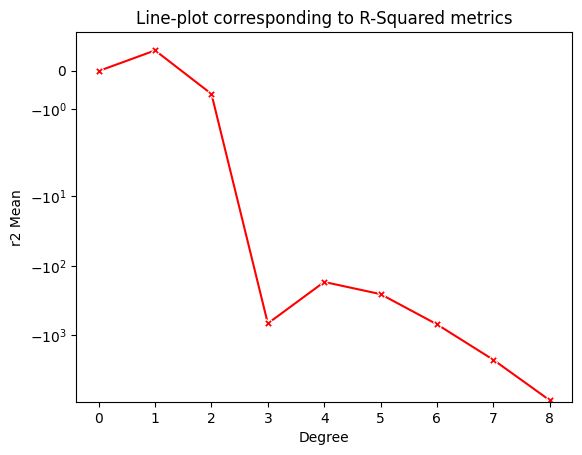

In [126]:
# Plotting a line-plot of r2 per degree
sns.lineplot(data=data, x=data['degree'], y=data['r2_mean'], marker="X" , color='red')
plt.yscale('symlog') # Using symmetric log to get a proper view of the datapoints
plt.ylim(top=1) # Limiting the top point to be 1 to get a clear view of the datapoints
plt.title('Line-plot corresponding to R-Squared metrics') # Setting the title
# Labelling the axes
plt.xlabel('Degree')
plt.ylabel('r2 Mean')
plt.show() # Printing out the graph

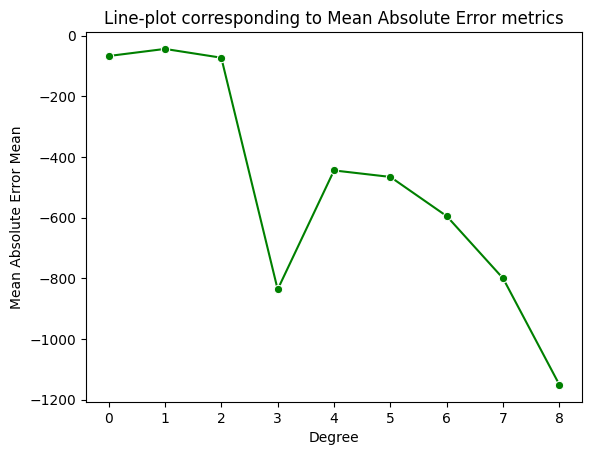

In [123]:
# Plotting a line plot of mae per degree
sns.lineplot(data=data, x=data['degree'], y=data['mae_mean'], marker="o", color="green")
plt.title('Line-plot corresponding to Mean Absolute Error metrics') # Setting the title
# Labelling the axes
plt.xlabel('Degree')
plt.ylabel('Mean Absolute Error Mean')
plt.show() # Printing out the graph

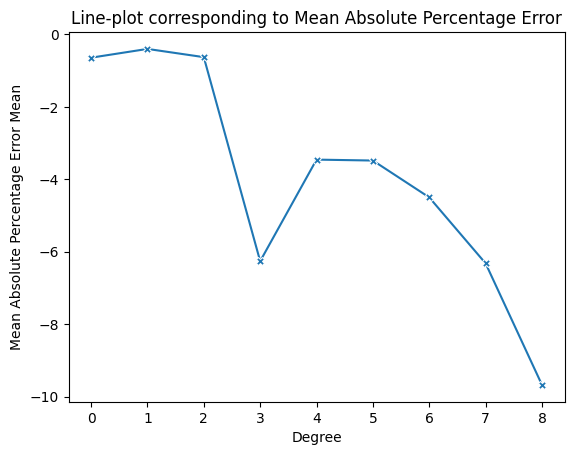

In [124]:
# Plotting a line plot of mape per degree
sns.lineplot(data=data, x=data['degree'], y=data['mape_mean'], marker="X")
plt.title('Line-plot corresponding to Mean Absolute Percentage Error') # Setting the title
# Labelling the axes
plt.xlabel('Degree')
plt.ylabel('Mean Absolute Percentage Error Mean')
plt.show() # Printing out the graph

***

#### Analysis and Interpretation
* While considering the graphs above, we could see that the best model for all three loss functions (R-Sqaured, MAE and MAPE), the highest value was for **degree 1**, making it the best fit. While degree 8 model had the least fit. 
* We could also observe that the **quality of the model kept decreasing** and that there was a huge dip in quality for degree 3 compared to other models.